In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GB/Итоговая КР Аналитик/Задание 2/ab_stats.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [ ]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [ ]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [ ]:
count_A = df[df['ab_group']=='A']['ab_group'].count()
count_A

11835

In [ ]:
count_B = df[df['ab_group']=='B']['ab_group'].count()
count_B

11817

Количество пользователей в двух группах значимо не отличается

In [ ]:
revenue_A = np.array(df[
    (df['ab_group']=='A') &
     (df['purchase']==1)
     ]['revenue'])
revenue_B = np.array(df[
    (df['ab_group']=='B') &
     (df['purchase']==1)
     ]['revenue'])

Сформировали два массива, содержащих значения выручки в том случае, если покупка была совершена, поскольку мы сравниваем доход только с платящих пользователей. В каждый массив попадают только пользователи группы А или В соответсвенно.

<Axes: ylabel='Count'>

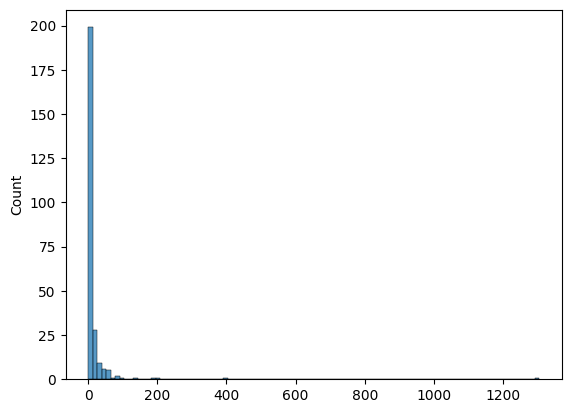

In [ ]:
sns.histplot(revenue_A, bins=100)

<Axes: ylabel='Count'>

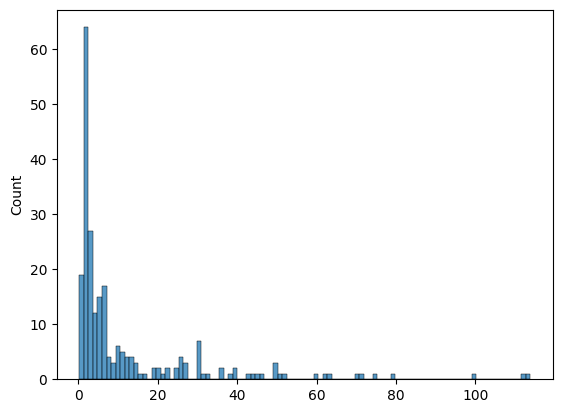

In [ ]:
sns.histplot(revenue_B, bins=100)

In [ ]:
sps.shapiro(revenue_A)

ShapiroResult(statistic=0.1513245701789856, pvalue=2.4723388038366e-32)

In [ ]:
sps.shapiro(revenue_B)

ShapiroResult(statistic=0.6179500818252563, pvalue=1.599590675565433e-22)

Тест Шапиро-Уилка для массивов значений выручки с пользователей в обеих группах показал, что распределение отличается от нормального, графики также отражают картины, отличающиеся от нормального распределения

In [ ]:
sps.kstest(revenue_A, 'norm')

KstestResult(statistic=0.8312038740127529, pvalue=5.535202851866456e-197, statistic_location=1.9727, statistic_sign=-1)

In [ ]:
sps.kstest(revenue_B, 'norm')

KstestResult(statistic=0.8635160979681316, pvalue=1.877582850318655e-202, statistic_location=1.953625, statistic_sign=-1)

Перестрахуемся, проверим на нормальность по тесту Колмогорова-Смирнова, pvalue в обоих случаях снова гораздо меньше 1%, гипотезу о нормальности распределений отклоняем

In [ ]:
(len(revenue_A) - len(revenue_B))/len(revenue_B)

0.09401709401709402

Количество платящих пользователей в первой группе на 9.4% больше по сравнению с первой

In [ ]:
sps.mannwhitneyu(revenue_A, revenue_B)

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

Тест Манна-Уитни говорит о том, что значимых различий между группами нет, т.к. pvalue=0.88, что гораздо больше 5%-го уровня значимости, и тем более 1%-го

## Вывод
Учитывая вышесказанное, нет необходимости применять альтернативный вариант, тестируемый в группе В, и оставить текущий вариант А